# MAC0209 - Modelagem e Simulação
# Pynamical: Demo of logistic map and bifurcation diagrams

Author: Geoff Boeing

Modified by: R. Hirata Jr. to be used in MAC0209

Leia o artigo completo aqui:
http://geoffboeing.com/2015/03/chaos-theory-logistic-map/



In [7]:
from pynamical import simulate, bifurcation_plot, save_fig, title_font, label_font, linear_map
import pandas as pd
import numpy as np 
import IPython.display as display
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline

## Modelos Lineares

Um modelo ingênuo para o crescimento de uma população é o seguinte:


$$\large P_{n+1} = r*P_n$$

Vejamo como ele se comporta em 20 interações, para 12 valores diferentes de $r$ de $[0.5,2.5]$

O código abaixo simula as iterações.

In [4]:
pops = simulate(model=linear_map,num_gens=20, rate_max=2.5,num_rates=12)
pops.applymap(lambda x: '{:03.3f}'.format(x))

,0.5,0.6818181818181819,0.8636363636363636,1.0454545454545454,1.2272727272727273,1.4090909090909092,1.5909090909090908,1.7727272727272727,1.9545454545454546,2.1363636363636367,2.3181818181818183,2.5
0,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
1,0.250,0.341,0.432,0.523,0.614,0.705,0.795,0.886,0.977,1.068,1.159,1.250
2,0.125,0.232,0.373,0.546,0.753,0.993,1.265,1.571,1.910,2.282,2.687,3.125
3,0.062,0.158,0.322,0.571,0.924,1.399,2.013,2.785,3.733,4.875,6.229,7.812
4,0.031,0.108,0.278,0.597,1.134,1.971,3.203,4.938,7.297,10.415,14.440,19.531
5,0.016,0.074,0.240,0.624,1.392,2.778,5.096,8.753,14.263,22.251,33.474,48.828
6,0.008,0.050,0.207,0.653,1.709,3.914,8.107,15.517,27.877,47.536,77.599,122.070
7,0.004,0.034,0.179,0.683,2.097,5.515,12.897,27.508,54.487,101.554,179.888,305.176
8,0.002,0.023,0.155,0.714,2.573,7.771,20.518,48.765,106.497,216.956,417.013,762.939
9,0.001,0.016,0.134,0.746,3.158,10.950,32.642,86.446,208.153,463.497,966.713,1907.349


## Modelos não lineares

O modelo anterior é muito simplificado e tem um problema sério. Qual é?


Perfeito, a população cresce indefinidamente, ou decresce monotonicamente até a estabilidade.

Uma pequena modificação ao modelo seria a introdução de um termo de correção não linear.

$$\large x_{n+1} = r*x_n (1-x_n)$$

Essa função é uma versão discretizada da famosa equação diferencial cuja solução é a função logística, muito usada em redes neurais.

$$\large \frac{d}{dx}f(x) = f(x)(1-f(x))$$

Função logística $f(x) = \frac{e^x}{e^x + c}$, onde $c$ é uma constante. 

O código abaixo usa o pacote pynamical do Geoff Boeing para simular esse comportamento. 

A função simulate calcula a função logística (e algumas outras) durante um certo número de iterações (num_gens) e num intervalo de $r$ de rate_min até rate_max (com num_rates). O valor inicial de $x_0$ é 0.5 (mas pode ser mudado). 

A chamada da função simulate pode ser apresentada facilmente numa tabela onde os índices à esquerda são as iterações e os rótulos de cima são os valores de $r$

In [5]:
# run the logistic model for 20 generations for 7 growth rates between 0.5 and 3.5 then view the output
pops = simulate(num_gens=20, rate_min=0.5, rate_max=3.5, num_rates=12)
pops.applymap(lambda x: '{:03.3f}'.format(x))

,0.5,0.7727272727272727,1.0454545454545454,1.3181818181818181,1.5909090909090908,1.8636363636363635,2.1363636363636362,2.409090909090909,2.6818181818181817,2.954545454545454,3.227272727272727,3.5
0,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
1,0.125,0.193,0.261,0.330,0.398,0.466,0.534,0.602,0.670,0.739,0.807,0.875
2,0.055,0.120,0.202,0.291,0.381,0.464,0.532,0.577,0.593,0.570,0.503,0.383
3,0.026,0.082,0.168,0.272,0.375,0.463,0.532,0.588,0.647,0.724,0.807,0.827
4,0.013,0.058,0.146,0.261,0.373,0.463,0.532,0.584,0.612,0.590,0.503,0.501
5,0.006,0.042,0.131,0.254,0.372,0.463,0.532,0.585,0.637,0.714,0.807,0.875
6,0.003,0.031,0.119,0.250,0.372,0.463,0.532,0.585,0.620,0.603,0.503,0.383
7,0.002,0.023,0.109,0.247,0.372,0.463,0.532,0.585,0.632,0.707,0.807,0.827
8,0.001,0.018,0.102,0.245,0.371,0.463,0.532,0.585,0.624,0.611,0.503,0.501
9,0.000,0.013,0.096,0.244,0.371,0.463,0.532,0.585,0.629,0.702,0.807,0.875


In [8]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


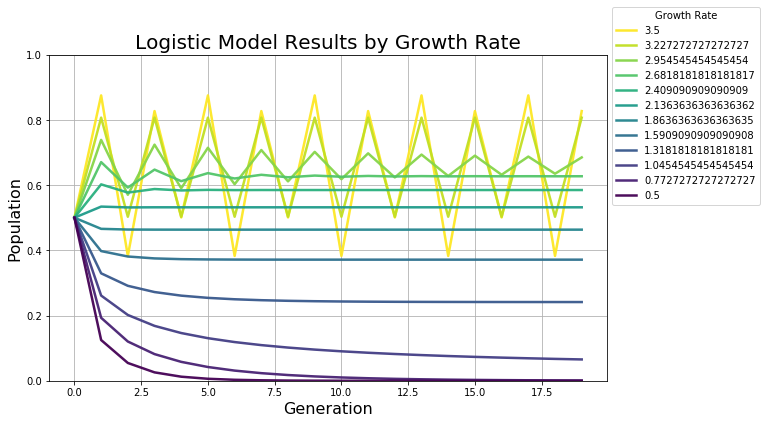

In [9]:
# plot the results of the logistic map run for these 7 different growth rates
#color_list = ['#cc00cc', '#4B0082', '#0066cc', '#33cc00', '#cccc33', '#ff9900', '#ff0000']
color_list = get_colors('viridis', n=len(pops.columns), start=0., stop=1)
for color, rate in reversed(list(zip(color_list, pops.columns))):
    ax = pops[rate].plot(kind='line', figsize=[10, 6], linewidth='2.5', alpha=0.95, c=color)
ax.grid(True)
ax.set_ylim([0, 1])
ax.set_title('Logistic Model Results by Growth Rate', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.525))

save_fig('logistic-map-growth-rates')
plt.show()

Se você entendeu até aqui, agora vai ficar mais divertido pois vamos estudar o comportamento do sistema numa quantidade de pontos ainda maior, digamos 1000 pontos no intervalo de 0 a 4. 

Essa visualização vai servir para visualizarmos certos pontos chamados de atratores do sistema, que são pontos para os quais o sistema dinâmico tende a evoluir independente do valor inicial.

O gráfico usado para visualizar esses pontos é, portanto, o diagramas de bifurcação

Veja o diagrama abaixo. Ele apresenta, para cada $r$ no intervalo de 0 a 4, os valores da simulação até a centésima geração (foi descartada a primeira: nim_discard = 1).

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


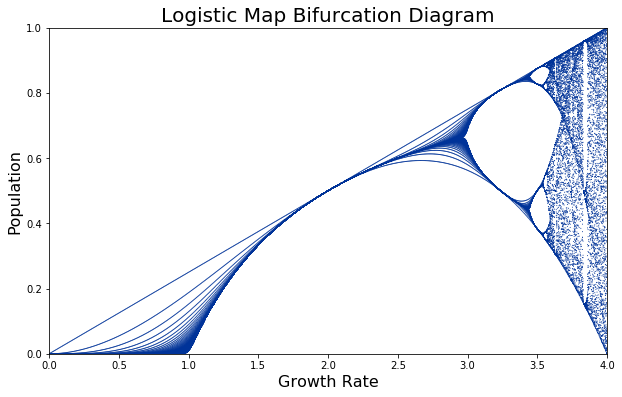

In [10]:
# run the model for 100 generations across 1000 growth rate steps from 0 to 4 then plot the bifurcation diagram
pops = simulate(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=1)
bifurcation_plot(pops, filename='logistic-map-bifurcation-0')

Se, agora, descartarmos as 100 primeiras iterações e ficarmos apenas com os valores atratores, o diagrama fica assim:

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


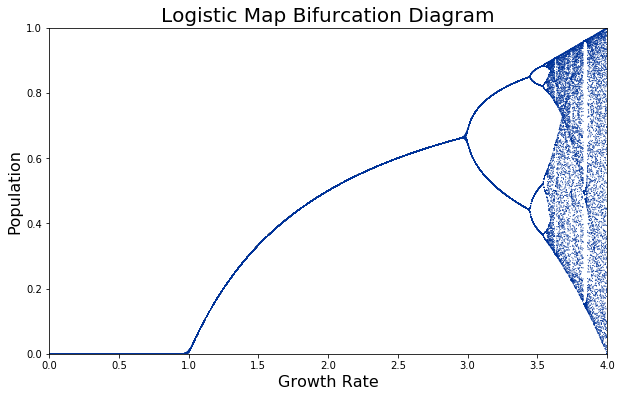

In [11]:
# plot the bifurcation diagram for 200 generations, but this time throw out the first 100 rows
# 200-100=100, so we still have 100 generations in the plot, just like in the previous cell
# this will show us only the attractors (aka, the values that each growth rate settles on over time)
pops = simulate(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops, filename='logistic-map-bifurcation-1')

Suponha que estamos interessados em estudar o intervalo de $[2.8,4.0]$, o que devemos fazer. Sim, mais uma vez, descartaremos as primeiras iterações (desta vez as primeiras 200 iterações) e estudaremos apenas no intervalo de $r$ de 2.8 a 4. 

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


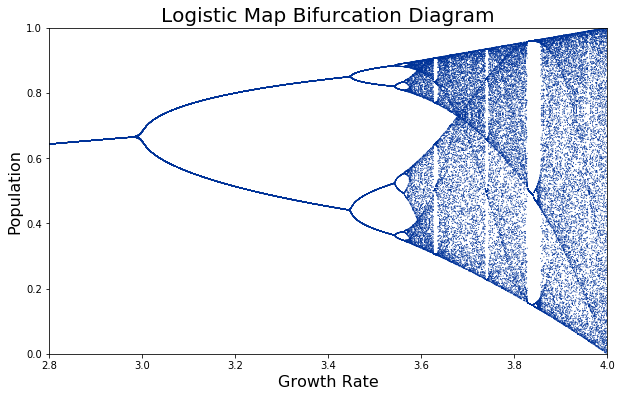

In [13]:
# run the model for 300 generations across 1,000 growth rate steps from 2.8 to 4, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows the period-doubling path to chaos
pops = simulate(num_gens=100, rate_min=2.8, rate_max=4, num_rates=1000, num_discard=200, initial_pop=0.1)
bifurcation_plot(pops, xmin=2.8, xmax=4, filename='logistic-map-bifurcation-2')

Vamos mais uma vez descartar as 100 primeiras iterações e calcular os atratores para os valores de $r$ de 3.7 a 3.9.  

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


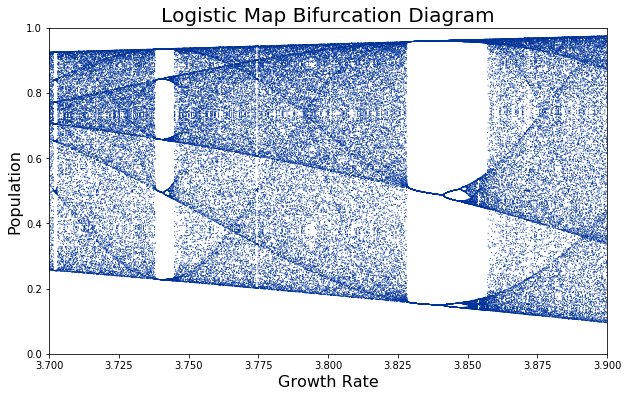

In [14]:
# run the model for 200 generations across 1,000 growth rate steps from 3.7 to 3.9, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows more detail in the chaotic regimes
pops = simulate(num_gens=100, rate_min=3.7, rate_max=3.9, num_rates=1000, num_discard=100)
bifurcation_plot(pops, xmin=3.7, xmax=3.9, filename='logistic-map-bifurcation-3')

No intervalo (r=3.6 to 4=4.0), o sistema tem um atrator estranho (um valor ao redor do qual o sistema oscila para sempre, sem nunca se repetir, permanecendo num estado estável) com estrutura fractal.

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


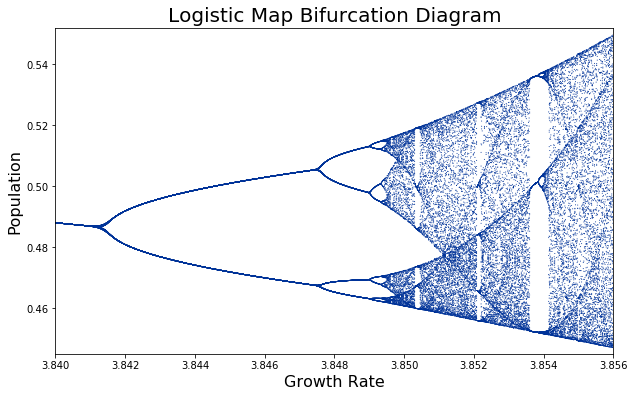

In [15]:
# run the model for 500 generations across 1,000 growth rate steps from 3.84 to 3.856, and plot the bifurcation diagram
# throw out the first 300 generations, so we end up with 200 generations in the plot
# this plot is a zoomed-in look at the first plot and shows the same structure we saw at the macro-level
pops = simulate(num_gens=200, rate_min=3.84, rate_max=3.856, num_rates=1000, num_discard=300)
bifurcation_plot(pops, xmin=3.84, xmax=3.856, ymin=0.445, ymax=0.552, filename='logistic-map-bifurcation-4')

Vamos agora visualizar como o sistema é sensível à condição inicial. Vamos simular com duas razões diferenes, $r = 3.9$ (em azul) e $r = 3.90001$ (em vermelho). Note como, a parir da vigésima geração, a simulação muda.

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


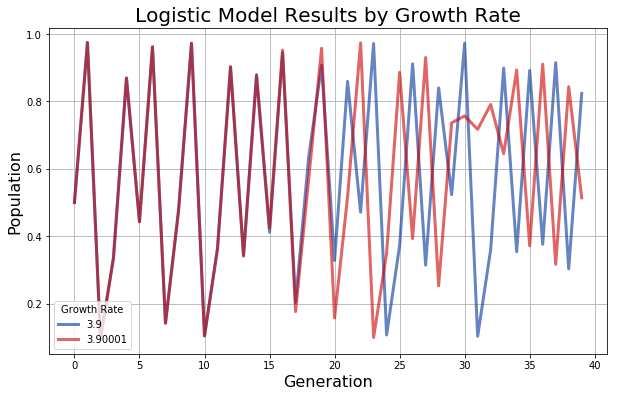

In [16]:
# plot the numeric output of the logistic model for growth rates of 3.9 and 3.90001
# this demonstrates sensitive dependence on the parameter
rate1 = 3.9
rate2 = rate1 + 0.00001

pops = simulate(num_gens=40, rate_min=rate1, rate_max=rate2, num_rates=2)
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['#003399','#cc0000'])
ax.grid(True)
ax.set_title('Logistic Model Results by Growth Rate', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(title='Growth Rate', loc=3)

save_fig('logistic-map-parameter-sensitivity')
plt.show()

Vamos fazer o mesmo com duas condições iniciais diferentes, $x_0 = 0.5$ (em azul) e $x_0 = 0.50001$ (em vermelho). Note como, a parir da trigésima geração, a simulação muda.

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


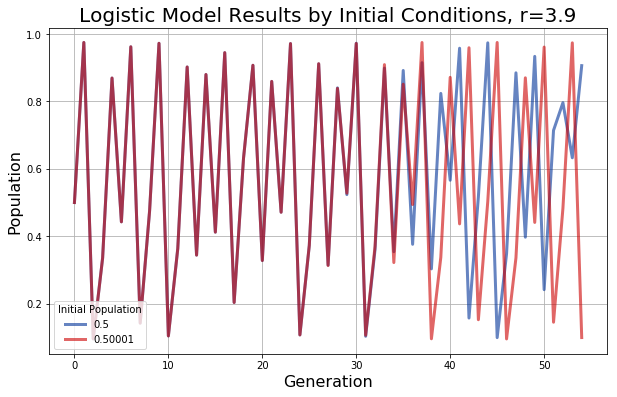

In [17]:
# plot the numeric output of the logistic model at growth rate 3.9 for 2 similar starting population values
# this demonstrates sensitive dependence on initial conditions, as they diverge through chaos
r = 3.9
pops1 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.5)
pops2 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['#003399','#cc0000'])
ax.grid(True)
ax.set_title('Logistic Model Results by Initial Conditions, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(title='Initial Population', loc=3)

save_fig('logistic-map-initial-conditions')
plt.show()

Vamos agora visualizar como o sistema é estável se a razão for $r=3.65$, mas $x_0$ forem próximas.

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


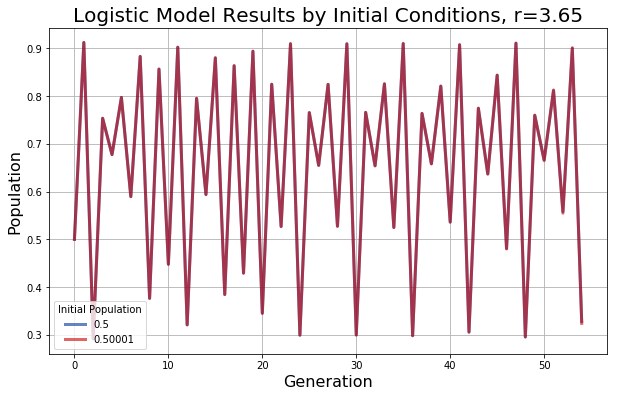

In [18]:
# plot the numeric output of the logistic model at growth rate 3.65 for 2 similar starting population values
# this demonstrates how very similar conditions do not diverge when the rate is not chaotic
r = 3.65
pops1 = simulate(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.5)
pops2 = simulate(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['#003399','#cc0000'])
ax.grid(True)
ax.set_title('Logistic Model Results by Initial Conditions, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(title='Initial Population', loc=3)

save_fig('logistic-map-initial-conditions-stable')
plt.show()